In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
data = pd.read_csv("data.csv")
data.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [3]:
data.shape

(2227, 3)

In [4]:
data.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [5]:
data.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [6]:
data["x1"].fillna(data["x1"].median(), inplace = True)
data["x2"].fillna(data["x2"].median(), inplace = True)

In [7]:
data.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

x1
0.07306866687422345


C:\Users\myks7\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


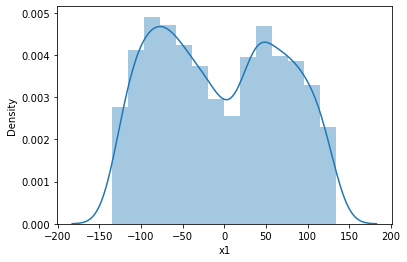

x2
33.325419149860345


C:\Users\myks7\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


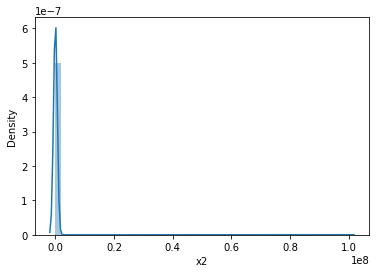

y
0.23235617048787108


C:\Users\myks7\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


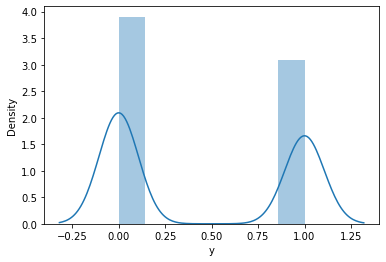

In [8]:
from scipy.stats import skew

for col in data:
    print(col)
    print(skew(data[col]))
    
    plt.figure()
    sns.distplot(data[col])
    plt.show()

In [9]:
for col in data:
    print("Column name is", col, "and skewness is", skew(data[col]))

Column name is x1 and skewness is 0.07306866687422345
Column name is x2 and skewness is 33.325419149860345
Column name is y and skewness is 0.23235617048787108


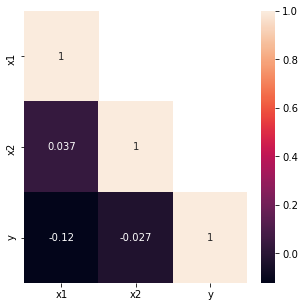

In [10]:
plt.figure(figsize = (5,5))
mask = np.array(data.corr())
mask[np.tril_indices_from(mask)]=False
sns.heatmap(data.corr(), mask = mask, annot =True)
plt.show()

C:\Users\myks7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\myks7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\myks7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


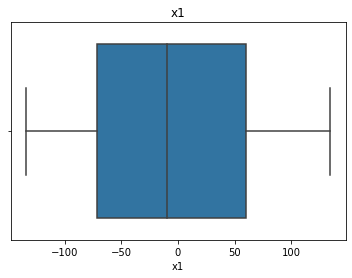

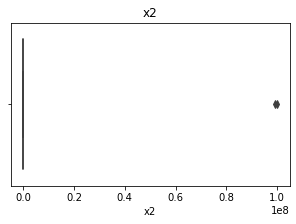

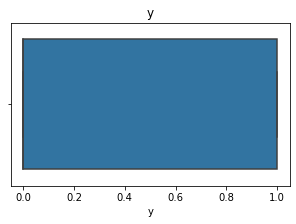

<Figure size 360x216 with 0 Axes>

In [11]:
for feature in data:
    data=data.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(5,3))

In [12]:
numerical = data.drop(["y"], axis = 1)

In [13]:
numerical.head()

,x1,x2
0,-119.366669,115.000000
1,-101.108044,97.777159
2,-130.278658,106.767654
3,-114.703415,101.195477
4,-119.366669,115.000000


In [14]:
# find numerical variables

numerical = [var for var in data.columns if data[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 3 numerical variables

The numerical variables are : ['x1', 'x2', 'y']


In [15]:
numerical

['x1', 'x2', 'y']

In [16]:
# view summary statistics in numerical variables

print(round(data[numerical].describe()),2)

           x1          x2       y
count  2227.0      2227.0  2227.0
mean     -5.0     89356.0     0.0
std      75.0   2981313.0     0.0
min    -134.0      -135.0     0.0
25%     -72.0       -80.0     0.0
50%     -10.0        -1.0     0.0
75%      60.0        64.0     1.0
max     135.0  99999999.0     1.0 2


In [17]:
IQR = data.x1.quantile(0.75) - data.x1.quantile(0.25)
Lower_fence = data.x1.quantile(0.25) - (IQR * 3)
Upper_fence = data.x1.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -465.22580457999993 or > 453.27768320999996


In [18]:
IQR = data.x2.quantile(0.75) - data.x2.quantile(0.25)
Lower_fence = data.x1.quantile(0.25) - (IQR * 3)
Upper_fence = data.x1.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -502.76166262000004 or > 490.81354125000007


### Split data into training and testing

In [19]:
X = data.drop(['y'], axis=1)

y = data['y']

In [20]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [21]:
X_train.shape, X_test.shape

((1558, 2), (669, 2))

#### Removing outliers

In [22]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['x1'] = max_value(df3, 'x1', 454.52)
    df3['x2'] = max_value(df3, 'x2',495.95)

<ipython-input-22-483c0ed6aecd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['x1'] = max_value(df3, 'x1', 454.52)
<ipython-input-22-483c0ed6aecd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['x2'] = max_value(df3, 'x2',495.95)
<ipython-input-22-483c0ed6aecd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [23]:
X_train.x2.max(), X_test.x2.max()

(495.95, 134.9297479)

In [24]:
X_train.x1.max(), X_test.x1.max()

(134.5086874, 134.17796040000002)

### Feature Scaling

In [25]:
X_train = pd.DataFrame(X_train)
X_train.head()

,x1,x2
1642,-53.319005,-86.905002
1976,98.633331,79.000000
1926,100.633331,110.000000
1340,42.633331,35.000000
712,-86.706787,93.667242


In [26]:

cols = X_train.columns

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [28]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [29]:
X_test = pd.DataFrame(X_test, columns=[cols])

### Logistic Regression

In [30]:

# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

#### Predict results

In [32]:

y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [33]:

# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

array([0.56099177, 0.62204417, 0.58173986, 0.49684959, 0.54616947,
       0.42461694, 0.61600251, 0.53538171, 0.59237863, 0.54077762,
       0.53183263, 0.62209744, 0.70728812, 0.62581471, 0.6624311 ,
       0.50890867, 0.51269567, 0.44260762, 0.55963138, 0.4989734 ,
       0.57930048, 0.50136807, 0.51816542, 0.60249281, 0.56262534,
       0.55048379, 0.59955225, 0.59456392, 0.5544019 , 0.62880383,
       0.63806089, 0.64561442, 0.39925481, 0.44081162, 0.68415281,
       0.51302154, 0.46527429, 0.62378837, 0.50758863, 0.47843857,
       0.64631711, 0.52238409, 0.52036149, 0.44028532, 0.46209464,
       0.51800418, 0.52456282, 0.50902464, 0.59052798, 0.60118921,
       0.5609176 , 0.45707153, 0.58884267, 0.45732475, 0.65467935,
       0.47907648, 0.57877425, 0.66518283, 0.65998936, 0.58864139,
       0.55254782, 0.64556789, 0.52979847, 0.65077063, 0.5030411 ,
       0.54287674, 0.52400076, 0.58607654, 0.52414994, 0.42573322,
       0.69192863, 0.50323251, 0.54013585, 0.53366385, 0.59720

In [34]:

# probability of getting output as 1 - rain

logreg.predict_proba(X_test)[:,1]

array([0.43900823, 0.37795583, 0.41826014, 0.50315041, 0.45383053,
       0.57538306, 0.38399749, 0.46461829, 0.40762137, 0.45922238,
       0.46816737, 0.37790256, 0.29271188, 0.37418529, 0.3375689 ,
       0.49109133, 0.48730433, 0.55739238, 0.44036862, 0.5010266 ,
       0.42069952, 0.49863193, 0.48183458, 0.39750719, 0.43737466,
       0.44951621, 0.40044775, 0.40543608, 0.4455981 , 0.37119617,
       0.36193911, 0.35438558, 0.60074519, 0.55918838, 0.31584719,
       0.48697846, 0.53472571, 0.37621163, 0.49241137, 0.52156143,
       0.35368289, 0.47761591, 0.47963851, 0.55971468, 0.53790536,
       0.48199582, 0.47543718, 0.49097536, 0.40947202, 0.39881079,
       0.4390824 , 0.54292847, 0.41115733, 0.54267525, 0.34532065,
       0.52092352, 0.42122575, 0.33481717, 0.34001064, 0.41135861,
       0.44745218, 0.35443211, 0.47020153, 0.34922937, 0.4969589 ,
       0.45712326, 0.47599924, 0.41392346, 0.47585006, 0.57426678,
       0.30807137, 0.49676749, 0.45986415, 0.46633615, 0.40279

In [35]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.7100


### Compare the train-set and test-set accuracy

In [36]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [38]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7125


###  Check for overfitting and underfitting

In [39]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.7125
Test set score: 0.7100


In [40]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [41]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.7253
Test set score: 0.7235


In [42]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [43]:

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.5623
Test set score: 0.5471


### Compare model accuracy with null accuracy

In [44]:
# check class distribution in test set

y_test.value_counts()

0    366
1    303
Name: y, dtype: int64

In [46]:
# check null accuracy score

null_accuracy = (366/(366+303))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.5471


In [47]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[353  13]
 [181 122]]

True Positives(TP) =  353

True Negatives(TN) =  122

False Positives(FP) =  13

False Negatives(FN) =  181


In [48]:

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.66      0.96      0.78       366
           1       0.90      0.40      0.56       303

    accuracy                           0.71       669
   macro avg       0.78      0.68      0.67       669
weighted avg       0.77      0.71      0.68       669



### Decision Tree

In [75]:

from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor(max_depth=4).fit(X_train,y_train)

In [76]:

#Predict the response for test dataset
Y_pred = model2.predict(X_test)

In [77]:
Y_pred

array([0.14611872, 0.        , 0.63768116, 1.        , 0.        ,
       1.        , 0.        , 0.63768116, 0.        , 0.        ,
       0.        , 0.        , 0.99585062, 0.        , 0.99585062,
       0.98076923, 0.        , 1.        , 0.14611872, 0.98076923,
       0.63768116, 0.98076923, 0.        , 0.13157895, 0.14611872,
       0.14611872, 0.14611872, 0.        , 0.63768116, 0.        ,
       0.99585062, 0.        , 1.        , 1.        , 0.99585062,
       0.        , 1.        , 0.99585062, 0.98076923, 1.        ,
       0.99585062, 0.        , 0.        , 1.        , 1.        ,
       0.98076923, 0.        , 0.98076923, 0.        , 0.        ,
       0.5       , 1.        , 0.13157895, 1.        , 0.99585062,
       1.        , 0.14611872, 0.99585062, 0.99585062, 0.14611872,
       0.14611872, 0.99585062, 0.        , 0.99585062, 0.98076923,
       0.5       , 0.        , 0.14611872, 0.63768116, 1.        ,
       0.99585062, 0.98076923, 0.        , 0.        , 0.99585

In [78]:
print('Train Score:',model2.score(X_train,y_train))
print('Test Score:',model2.score(X_test,y_test))

Train Score: 0.8195548485190176
Test Score: 0.8249545600090378


In [80]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, Y_pred))
print(metrics.mean_squared_error(y_test, Y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))

0.08339858802463519
0.04337328141665097
0.20826253003517212


### Support Vector Machine

In [82]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

y_pred5 = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[362   4]
 [ 36 267]]
0.9402092675635276
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       366
           1       0.99      0.88      0.93       303

    accuracy                           0.94       669
   macro avg       0.95      0.94      0.94       669
weighted avg       0.94      0.94      0.94       669



### KNN

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [85]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [86]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9602053915275995
Test set Accuracy:  0.9506726457399103


In [87]:
Ks = 11
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.93721973, 0.94020927, 0.95067265, 0.95067265, 0.95665172,
       0.95515695, 0.95665172, 0.95964126, 0.95964126, 0.96263079])

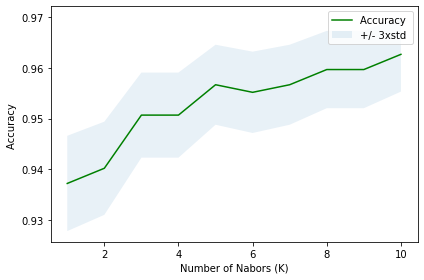

In [88]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [90]:
print( "The best accuracy was ", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was  0.9626307922272048 with k= 10


In [93]:
neigh7 = KNeighborsClassifier(n_neighbors = 10).fit(X_train,y_train)
yhat=neigh7.predict(X_test)
mean_acc7 = metrics.accuracy_score(y_test, yhat)
print( "The accuracy was ", mean_acc7, "with k= 10") 

The accuracy was  0.9626307922272048 with k= 10


In [94]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9492939666238768
Test set Accuracy:  0.9626307922272048
